Con el dataset de los vinos portugueses haced una serie de modelos de redes neuronales de regresión para predecir la calidad de los vinos comparándolos con los modelos que ya tenemos hechos (kNN, árboles, ensembles):

1.- La topología de la red neuronal tiene 11 entradas, una capa oculta de 120 neuronas (función de activación Relu) y una salida.

2.- Igual que el anterior pero escalando el dataset mediante normalización (media 0, desviación estándar 1) usando las herramientas de sklearn (ver trimestre anterior).

3.- Probar los apartados anteriores usando datos de validación.

4.- Crear un modelo con la topología de red descrita en esta lección de kaggle y comparar con los anteriores.

### Cargar datos

In [1]:
import inflection
import pandas as pd
import numpy as np


csv_path = './data/winequality-red.csv'
data = pd.read_csv(csv_path)
df_wines = pd.DataFrame(data)
df_wines.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_wines.columns]
df_wines.rename(columns={'quality':'target'}, inplace=True)
df_wines.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Distribución de datos

In [2]:
from sklearn.model_selection import train_test_split

X = df_wines.drop('target', axis=1)
y = df_wines.target

train, test = train_test_split(df_wines, test_size=0.33, random_state=42)
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

X_train = train.drop('target', axis=1)
y_train = train.target
X_test = test.drop('target', axis=1)
y_test = test.target

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head()) 


Conjunto de entrenamiento:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           12.4             0.350         0.49             2.6      0.079   
1            6.7             0.750         0.01             2.4      0.078   
2            6.6             0.630         0.00             4.3      0.093   
3           11.0             0.300         0.58             2.1      0.054   
4            8.4             0.745         0.11             1.9      0.090   

   free_sulfur_dioxide  total_sulfur_dioxide  density   p_h  sulphates  \
0                 27.0                  69.0  0.99940  3.12       0.75   
1                 17.0                  32.0  0.99550  3.55       0.61   
2                 51.0                  77.5  0.99558  3.20       0.45   
3                  7.0                  19.0  0.99800  3.31       0.88   
4                 16.0                  63.0  0.99650  3.19       0.82   

   alcohol  
0     10.4  
1     12.8  
2      9.5  
3     1

### Creación de la Red Neuronal
1.- La topología de la red neuronal tiene 11 entradas, una capa oculta de 120 neuronas (función de activación Relu) y una salida.

In [3]:

from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])




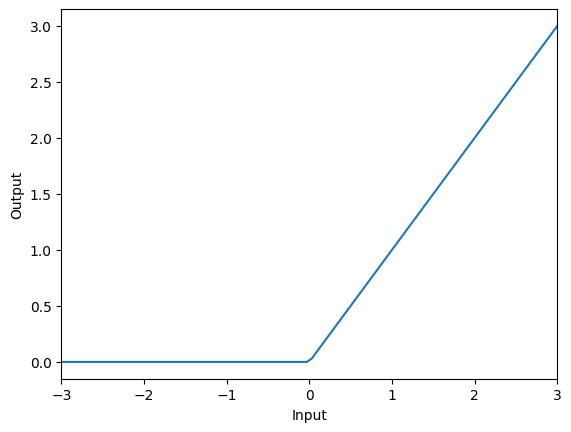

In [4]:
from matplotlib import pyplot as plt
import tensorflow as tf

# Instancia la clase Activation para crear una capa de activación
activation_layer = layers.Activation('relu')

# Genera 100 valores entre -3 y 3
x = tf.linspace(-3.0, 3.0, 100)

# Aplica la capa de activación a los valores x
y = activation_layer(x) 

# Grafica los valores
plt.figure(dpi=100) # Figura de 100 puntos por pulgada (dpi)
plt.plot(x, y) # Grafica x contra y
plt.xlim(-3, 3) # Establece el límite horizontal
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

### 2.- Igual que el anterior pero escalando el dataset mediante normalización (media 0, desviación estándar 1) usando las herramientas de sklearn (ver trimestre anterior).

In [5]:
# Escalar el conjunto de datos mediante normalización
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


features_num = [col for col in df_wines.columns if col != 'target']
features_num

preprocessor = make_column_transformer(
    (StandardScaler(), features_num)
)

X = df_wines.drop('target', axis=1)
y = df_wines.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]



In [6]:
# Crea el modelo
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(120, activation='relu'),
    layers.Dense(1),
])

# Configuración del modelo para entrenamiento
model.compile(
    optimizer='adam', # Ajusta la tasa de aprendizaje
    loss='mae', # Minimiza la diferencia absoluta promedio entre las predicciones del modelo y las etiquetas reales.
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512, # Es el número de ejemplos de entrenamiento que se utilizan en una iteración
    epochs=50, # Es la cantidad de veces que se pasa por todo el conjunto de entrenamiento
    verbose=0, # Es la cantidad de información que se muestra durante el entrenamiento
)



### 3.- Probar los apartados anteriores usando datos de validación.

Época con la Pérdida de Validación Mínima (momento de mejor predicción): 45
Mínima Pérdida de Validación (rendimiento del modelo): 0.0144


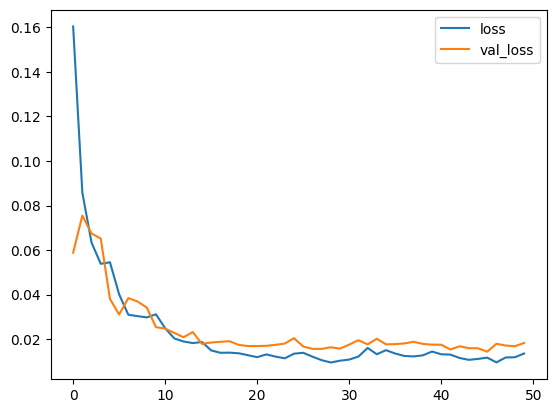

In [7]:
# Grafica la pérdida del modelo
history_df = pd.DataFrame(history.history)

# .loc selecciona desde la fila 0 hasta el final, y las columnas 'loss' y 'val_loss'
history_df.loc[0:, ['loss', 'val_loss']].plot()

# Índice del mínimo de pérdida de validación
min_val_loss_index = history_df['val_loss'].idxmin()

# Valor mínimo de pérdida de validación
min_val_loss = history_df.loc[min_val_loss_index, 'val_loss']

# Leyenda de la gráfica
print(f"Época con la Pérdida de Validación Mínima (momento de mejor predicción): {min_val_loss_index}")
print(f"Mínima Pérdida de Validación (rendimiento del modelo): {min_val_loss:0.4f}")